In [12]:
import pprint
import pandas as pd
from econ_utils import create_df, coinmarketcap_api
from constants import PALETTE
import squarify
import matplotlib.pyplot as plt
pp = pprint.PrettyPrinter(indent = 2)


In [2]:
response = coinmarketcap_api("cryptocurrency/listings/latest", 
  start=1,
  limit=1000,
  convert="USD"
)

In [63]:
df = pd.json_normalize(response["data"]).astype({"quote.USD.market_cap_dominance": "float"})
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9330,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.901145e+07,1.901145e+07,...,-2.479879,7.821933e+11,41.0361,8.640088e+11,2022-04-14T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5644,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.203744e+08,1.203744e+08,...,-4.328344,3.714721e+11,19.4850,3.714721e+11,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,31718,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.264884e+10,8.561395e+10,...,-0.020480,8.266655e+10,4.3350,8.563230e+10,2022-04-14T12:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,794,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.651168e+08,1.651168e+08,...,-11.410501,6.934329e+10,3.6373,6.934329e+10,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,3711,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.031117e+10,5.031117e+10,...,0.025479,5.030290e+10,2.1942,5.030290e+10,2022-04-14T12:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48


In [31]:
df.nlargest(10, "quote.USD.market_cap_dominance")

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9330,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.901145e+07,1.901145e+07,...,-2.479879,7.821933e+11,41.0361,8.640088e+11,2022-04-14T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5644,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.203744e+08,1.203744e+08,...,-4.328344,3.714721e+11,19.4850,3.714721e+11,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,31718,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.264884e+10,8.561395e+10,...,-0.020480,8.266655e+10,4.3350,8.563230e+10,2022-04-14T12:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,794,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,1.651168e+08,...,-11.410501,6.934329e+10,3.6373,6.934329e+10,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,3711,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.031117e+10,5.031117e+10,...,0.025479,5.030290e+10,2.1942,5.030290e+10,2022-04-14T12:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,712,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.813521e+10,9.998961e+10,...,-4.627715,3.500234e+10,1.8363,7.271670e+10,2022-04-14T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN
6,5426,Solana,SOL,solana,292,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.280547e+08,5.116169e+08,...,-27.342706,3.447618e+10,1.8084,5.376725e+10,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN
8,4172,Terra,LUNA,terra-luna,212,2019-07-26T00:00:00.000Z,"[cosmos-ecosystem, store-of-value, defi, payme...",NaN,3.615273e+08,7.449452e+08,...,10.661323,3.116839e+10,1.6347,6.422403e+10,2022-04-14T12:58:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,424,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.375256e+10,3.427770e+10,...,-22.465780,3.247557e+10,1.4166,4.329748e+10,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN
9,5805,Avalanche,AVAX,avalanche,231,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, polychain-capital-port...",NaN,2.682903e+08,3.958913e+08,...,-9.341798,2.161257e+10,1.1335,3.189168e+10,2022-04-14T12:57:00.000Z,NaN,NaN,NaN,NaN,NaN


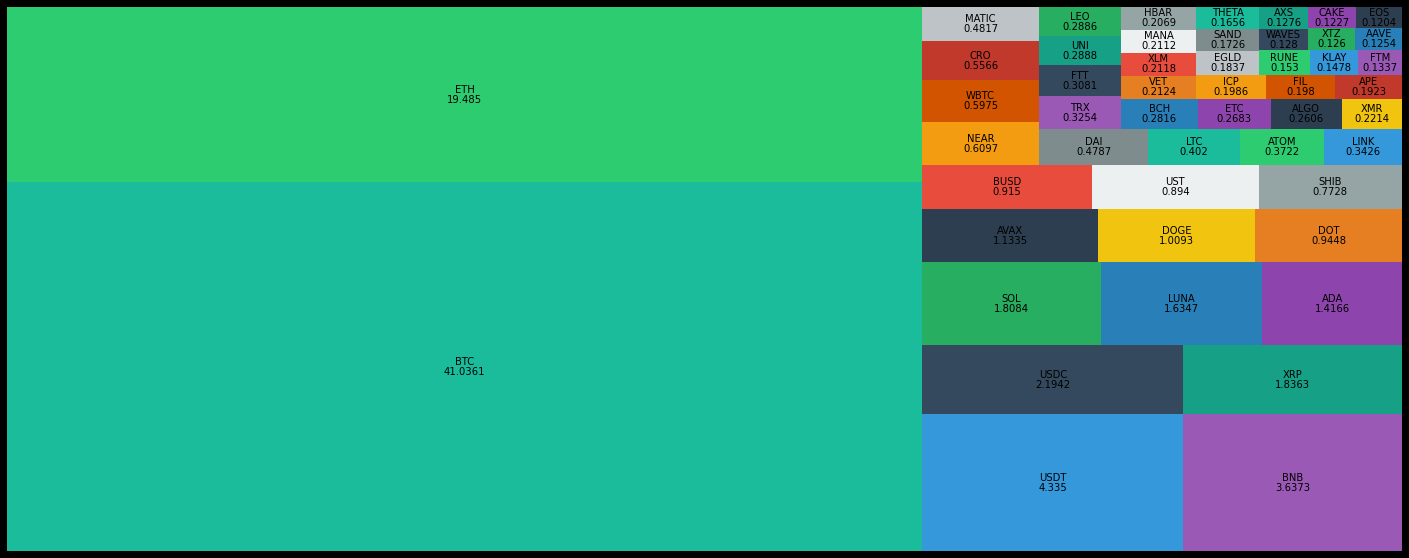

In [20]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
col_name = "quote.USD.market_cap_dominance"
cap_dominance_subset = df.nlargest(50, col_name)
squarify.plot(
  cap_dominance_subset[col_name],
  value=cap_dominance_subset[col_name],
  label=cap_dominance_subset["symbol"],
  color=PALETTE,
  ax=ax,
  text_kwargs={"color": "black"}
)
plt.axis("off")
plt.show()

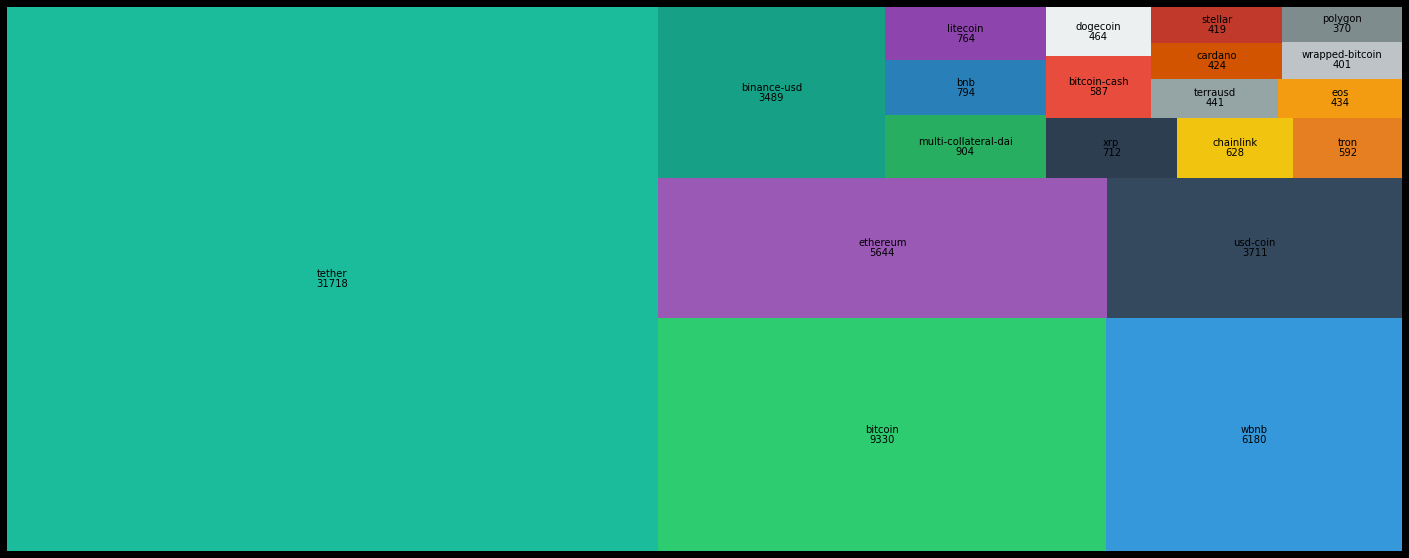

In [19]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
col_name = "num_market_pairs"
num_market_pairs_subset = df.nlargest(20, col_name)
squarify.plot(
  num_market_pairs_subset[col_name],
  value=num_market_pairs_subset[col_name],
  label=num_market_pairs_subset["slug"],
  color=PALETTE,
  ax=ax,
  text_kwargs={"color": "black"}
)
plt.axis("off")
plt.show()

In [64]:
df.loc[:, "percentage"] = df.total_supply / df.max_supply
df["percentage"].round(2)
supply = df[["symbol", "total_supply", "max_supply", "percentage"]]
supply.query("max_supply > 0").sort_values("percentage", ascending=False)

,symbol,total_supply,max_supply,percentage
288,USDX,1.725174e+08,1.564518e+07,1.102687e+01
211,HBTC,3.988408e+04,6.910000e+03,5.771937e+00
711,LGCY,1.000000e+11,2.100000e+10,4.761905e+00
302,MNGO,1.000000e+10,5.000000e+09,2.000000e+00
391,VRA,1.940088e+10,1.035647e+10,1.873311e+00
...,...,...,...,...
989,UBX,1.000000e+09,1.000000e+12,1.000000e-03
440,CUSD,7.667297e+07,1.000000e+15,7.667297e-08
384,EXRD,0.000000e+00,4.410000e+09,0.000000e+00
791,ID,0.000000e+00,8.000000e+08,0.000000e+00
